## git status
## git add .
## git commit -m "comment"
## git push

## 
## to refresh github ...
## 
## git add .
## git commit -m "a comment"
## git push 





<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree](#decision_tree)<br>
    7.2. [Random Forest](#random_forest)<br>
    7.3. [Comparing algorithm performances](#comparing_algorithm_performances)
8. [Tuning](#tuning)<br>

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [119]:
import pandas
import numpy as np
import pyarrow.parquet as pq

%matplotlib  inline

base = r'S:\BAEIT\ITIL\PerformanceManagementTeam\AssortedTasks\Learning\_Python\_Lib'

from DefaultItems import Python_Folder, Python_Data_Folder,  LogFileFolder, NYC_Data_Folder, Python_Lib_Folder, dbz

from inspect import currentframe, getframeinfo
from pathlib import Path


# 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [120]:
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

#trips_df = pq.read_table('./data/yellow_tripdata_2019-01.parquet')

trips_df = pq.read_table(Python_Data_Folder + r'\yellow_tripdata_2019-01.parquet')


trips_df = trips_df.to_pandas()
display( trips_df.head(2) )

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")



Line:  1 1.5


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None



Line:  11 1.5


# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

## Reduce the number of columns to examine initially.
## Focus on the "most meaningful" columns.

In [121]:
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

trips_df.columns


Line:  1 1.5


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [122]:
trips_df = trips_df[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type',
       'total_amount' ]]

In [123]:
trips_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<AxesSubplot:title={'center':'VendorID'}>,
        <AxesSubplot:title={'center':'passenger_count'}>,
        <AxesSubplot:title={'center':'trip_distance'}>],
       [<AxesSubplot:title={'center':'RatecodeID'}>,
        <AxesSubplot:title={'center':'PULocationID'}>,
        <AxesSubplot:title={'center':'DOLocationID'}>],
       [<AxesSubplot:title={'center':'payment_type'}>,
        <AxesSubplot:title={'center':'total_amount'}>, <AxesSubplot:>]],
      dtype=object)

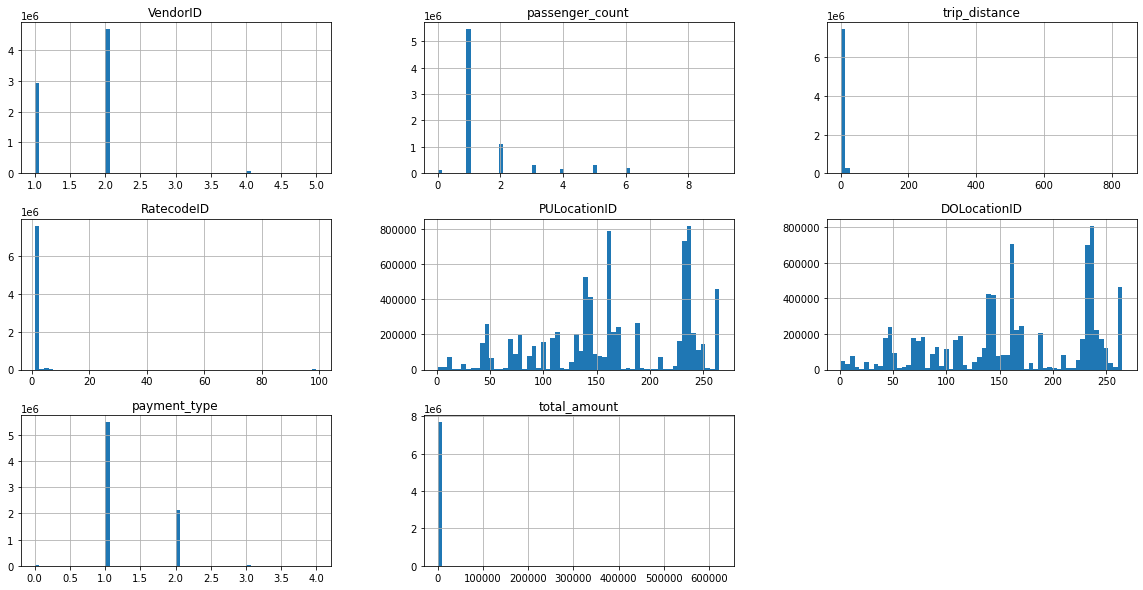

In [124]:
trips_df.hist(figsize=(20,10), bins=60) 


## Look At RatecodeID
<a id='Look At RatecodeID'></a>
[Back to top](#table_of_contents)


In [125]:

trips_df['RatecodeID'].value_counts()

1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: RatecodeID, dtype: int64

## Investigate total_amount - there appear to be bogus values
<a id='Look At RatecodeID'></a>
[Back to top](#table_of_contents)


## Look at total_amount values by ranges
<a id='Look At RatecodeID'></a>
[Back to top](#table_of_contents)


<AxesSubplot:xlabel='index', ylabel='total_amount'>

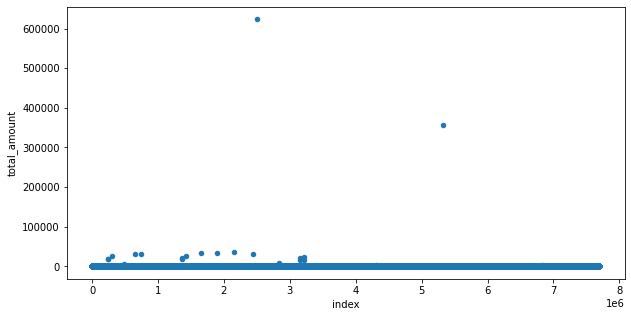

In [126]:
trips_df.reset_index().plot( kind='scatter', y='total_amount', x='index', figsize=(10,5) )

## Look at total_amount values by ranges
<a id='Look At RatecodeID'></a>
[Back to top](#table_of_contents)



Line:  1 1.5


<AxesSubplot:xlabel='total_amount', ylabel='index'>

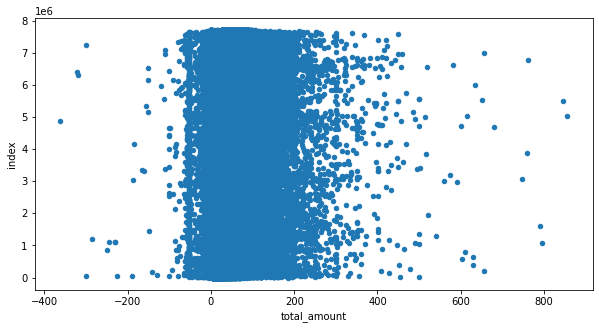

In [127]:
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

trips_df[ trips_df['total_amount'] < 1000].reset_index().plot( kind='scatter', x='total_amount', y='index', figsize=(10,5))

## Negative values and very large values!!


Line:  2 1.5

Line:  5 1.5


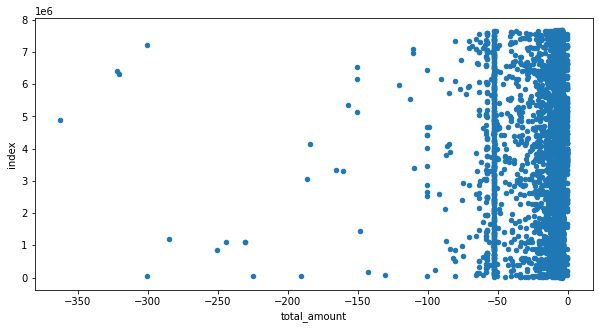

In [128]:
##
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

trips_df[ trips_df['total_amount'] < 0 ].reset_index().plot( kind='scatter', x='total_amount', y='index', figsize=(10,5))
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")


In [129]:

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")
trips_ltz = trips_df[ trips_df['total_amount'] < 0 ].reset_index() 

display( trips_ltz.shape)
display( trips_ltz.head() )
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")



Line:  2 1.5


(7127, 11)

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,663,2,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
1,2402,2,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2,2541,2,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
3,2544,2,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
4,2547,2,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3



Line:  7 1.5


In [130]:
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

display( trips_df.head(2) )
display( trips_df.shape )
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")



Line:  1 1.5


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30


(7696617, 10)


Line:  5 1.5


## look at payment_type for trips_ltz

In [133]:
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")


display( trips_ltz['payment_type'].value_counts()  ) # # most are #3 and #4 'no charte' 'dispute'

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")



Line:  1 1.5


3    4083
4    2667
2     376
1       1
Name: payment_type, dtype: int64


Line:  6 1.5


## look at payment_type = 2 or 1 in trips_ltz
<a id='Look At RatecodeID'></a>
[Back to top](#table_of_contents)


In [134]:

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

mask_ltz1or2 = trips_ltz['payment_type'].isin([ 1, 2])
display( trips_ltz[ mask_ltz1or2 ] )

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")



Line:  2 1.5


,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
7,3927,2,2019-01-01 00:22:39,2019-01-01 00:27:20,1.0,0.70,2.0,142,142,2,-52.8
9,5300,2,2019-01-01 00:55:49,2019-01-01 01:30:04,1.0,15.13,1.0,79,184,2,-44.8
13,12458,2,2019-01-01 00:19:17,2019-01-01 00:20:57,1.0,0.10,1.0,107,100,2,-4.3
48,41242,2,2019-01-01 02:34:31,2019-01-01 02:40:50,4.0,0.80,1.0,179,7,2,-6.8
86,62172,2,2019-01-01 05:15:11,2019-01-01 05:25:14,1.0,4.25,1.0,145,49,2,-15.3
...,...,...,...,...,...,...,...,...,...,...,...
7067,7614880,2,2019-01-31 20:58:29,2019-01-31 21:07:37,1.0,2.32,1.0,229,79,2,-10.3
7091,7637634,2,2019-01-31 21:52:31,2019-01-31 22:01:20,1.0,7.09,1.0,130,138,2,-21.3
7101,7648220,2,2019-01-31 22:04:01,2019-01-31 22:09:07,2.0,1.34,1.0,249,68,2,-7.8
7104,7650024,2,2019-01-31 22:39:05,2019-01-31 22:40:22,1.0,0.14,1.0,162,162,2,-4.3



Line:  7 1.5



Line:  2 1.5

Line:  6 1.5


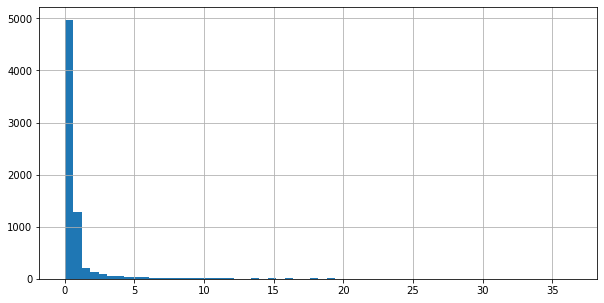

In [135]:

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

trips_df[ trips_df['total_amount'] < 0]['trip_distance'].hist(bins=60, figsize=(10,5))

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")


## Look into total_amount == 0

<a id='Look At RatecodeID'></a>
[Back to top](#table_of_contents)


In [138]:

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

display( trips_df[ trips_df['total_amount'] == 0].shape ) # number of zero values
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")



Line:  2 1.5


(1643, 10)


Line:  5 1.5


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,1,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,1,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0



Line:  9 1.5


In [139]:

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")
display( trips_df[ trips_df['total_amount'] == 0].head() )

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")



Line:  2 1.5


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,1,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,1,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0



Line:  5 1.5



Line:  2 1.5

Line:  6 1.5


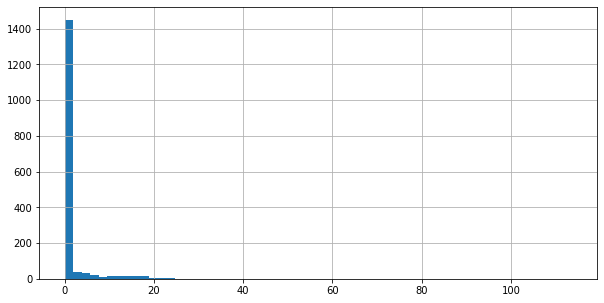

In [145]:

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

trips_df[ trips_df['total_amount'] == 0]['trip_distance'].hist(bins=60, figsize=(10,5))

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")



In [146]:

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

display( trips_df[ trips_df['total_amount'] == 0]['trip_distance'].value_counts() )
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")



Line:  2 1.5


0.00    1323
0.03       9
0.01       8
0.06       6
0.09       4
        ... 
0.64       1
3.65       1
5.70       1
0.18       1
4.89       1
Name: trip_distance, Length: 256, dtype: int64


Line:  5 1.5


## isnull() checks for NaN, None, NaN, and NaT

In [ ]:
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")
display( trips_df.isnull().tail() )
display( trips_df.isnull() )
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

## isnum().sum(axis=0).sum(axis=0) givs total number of "missing" values in the dataset.

In [ ]:
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

display( trips_df.isnull().sum(axis=0).sum(axis=0) )

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")



## enumerate columns and a count "missing" values in each - 
## (7696617, 19)
## 12,667,520

In [ ]:
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

display( trips_df.isnull().sum(axis=0) )

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")



## inspect passenger_count because it has 28,672 missing values

In [ ]:
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

display( trips_df['passenger_count'] )

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")


In [ ]:


print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

display( trips_df['passenger_count'].value_counts(dropna=False) )

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")


## isolate passenger_count = NaN into df_pc_NaN

In [ ]:

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")
#mask = ( trips_df['status'] == 'Stump' ) | ( trips_df['status'] == 'Dead')
mask = ( trips_df['passenger_count'].isna() ) 
df_pc_NaN = trips_df[mask]
display(df_pc_NaN)
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")


# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

##
## assure that every column/Series is of an appropriate type
##

In [ ]:
trips_df.dtypes

## inspect values in VendorID, type int64 and confirm ...

In [ ]:
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

display( trips_df['VendorID'].value_counts(dropna=False) )

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")



## 

## inspect passenger_count, type is float4
##
## I cannot cast to np.64 because of the NaNs.
##

In [ ]:
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

display( trips_df['passenger_count'].value_counts(dropna=False) )

print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

#trips_df['passenger_count'] = trips_df['passenger_count'].astype(np.int64)
#display( trips_df['passenger_count'].value_counts(dropna=False) )



## Inspect RateCodeID
## per document "data_dictionary_trip_records_yellow.pdf" RateCodeID should be type np.int64

In [ ]:
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

trips_df.dtypes
trips_df['RatecodeID'].value_counts() 
print("\nLine: ", getframeinfo(currentframe()).lineno, dbz(3, 2), end="\n")

display( trips_df['RatecodeID'].value_counts() )

mask_not_contains_2304 = trips_df['RatecodeID'].str.contains('N' ) == False

# remove the dot
trips_df['RatecodeID'].replace('\.','')
trips_df['RatecodeID'] =  trips_df.astype( str  )  #WORKS!!!

trips_df.loc[ trips_df['RatecodeID'] == "N",: ]                                                                                                                                         



# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_contents)

# 6. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

# 7. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

## 7.1. Decision tree <a id='decision_tree'></a>

## 7.2. Random forest <a id='random_forest'></a>

## 7.3. Comparing algorithm performances <a id='comparing_algorithm_performances'></a>

# 8. Tuning <a id='tuning'></a>
[Back to top](#table_of_contents)